In [78]:
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, RepeatVector
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.optimizers import SGD, RMSprop, Adam
from keras import objectives
import pandas as pd
import sklearn.model_selection
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [79]:
def stringToDateTime(columns):
    datetime=columns[0]
    if pd.isnull(datetime):
        return datetime
    else:
        return dt.datetime.strptime(datetime, '%Y-%m-%d %H:%M:%S')

In [80]:
def datetimeToFloat(columns):
    d=columns[0]
    return d.timestamp()

In [81]:
def extractMonth(columns):
    datetime=columns[0]
    if pd.isnull(datetime):
        return datetime
    else:
        return datetime.month

In [82]:
def extractdayOfWeek(columns):
    date=columns[0]
    if pd.isnull(date):
        return date
    else:
        return date.weekday()

In [83]:
def extractday(columns):
    datetime=columns[0]
    if pd.isnull(datetime):
        return datetime
    else:
        return datetime.day

In [84]:
def datetimeToFloat(columns):
    d=columns[0]
    return d.timestamp()

In [85]:
def formatDate(columns):
    datetime=columns[0]
    if pd.isnull(datetime):
        return datetime
    else:
        return str(datetime.day)+'/'+str(datetime.month)+'/'+str(datetime.year)

In [86]:
def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., 
                                  stddev=epsilon_std)
        return z_mean + z_log_var * epsilon

In [87]:
#Read the data
data=pd.read_csv('1.csv', delimiter='\t')

In [88]:
#Check the number of data and its datatype
data.head()

,time,Visitor
0,2016-09-29 01:00:00,0
1,2016-09-30 01:00:00,100
2,2016-10-01 01:00:00,263
3,2016-10-02 01:00:00,199
4,2016-10-03 01:00:00,176


In [89]:
#Check the number of null values
data.isnull().sum()

time       0
Visitor    0
dtype: int64

In [90]:
#Convert date string to datetime object
data['time']=data[['time']].apply(stringToDateTime,axis=1)

In [91]:
#Extract day from datetime
data['day']=data[['time']].apply(extractday,axis=1)

In [92]:
#Extract month
data['month']=data[['time']].apply(extractMonth,axis=1)

In [93]:
#Extract day of the week
data['dayOfWeek']=data[['time']].apply(extractdayOfWeek,axis=1)

In [94]:
#Format the datetime for graph
data['formattedDate']=data[['time']].apply(formatDate,axis=1)

In [95]:
#Convert the datetime to time from epoch time
data['time']=data[['time']].apply(datetimeToFloat,axis=1)

In [96]:
#Create dummy variables for categorical day of the week
dayOfWeekDumyList = pd.get_dummies(data['dayOfWeek'], prefix='dayOfWeek')
data=data.join(dayOfWeekDumyList)
data=data.drop('dayOfWeek',axis=1)

In [97]:
#Create dummy variables for categorical month
monthDumyList = pd.get_dummies(data['month'], prefix='month')
data=data.join(monthDumyList)
data=data.drop('month',axis=1)

In [98]:
#Create dummy variables for categorical day
dayDumyList = pd.get_dummies(data['day'], prefix='day')
data=data.join(dayDumyList)
data=data.drop('day',axis=1)

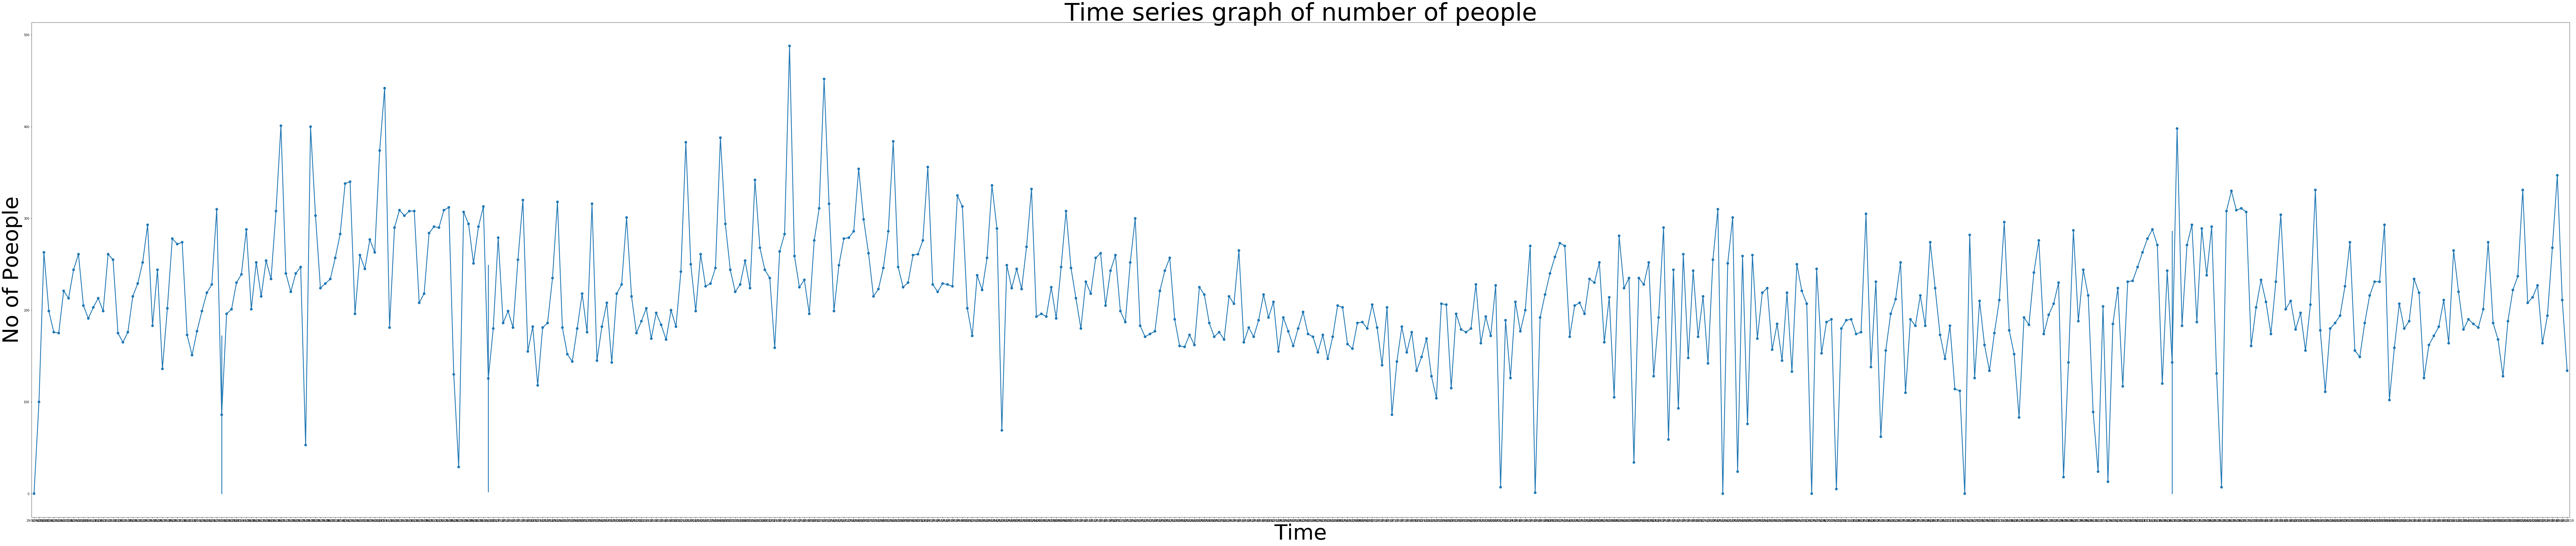

In [99]:
#Plot the graph No of people against Time
mpl.rcParams['figure.figsize']=150,30
fig=sns.pointplot(x='formattedDate',y='Visitor',data=data)
fig.set_xlabel('Time',fontsize=70)
fig.set_ylabel('No of Poeople',fontsize=70)
fig.axes.set_title('Time series graph of number of people',fontsize=80)
plt.show()

In [100]:
#Drop time and formatted date from the data
data=data.drop('time',axis=1)
data=data.drop('formattedDate',axis=1)

In [74]:
'''min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)'''

'min_max_scaler = preprocessing.MinMaxScaler()\nnp_scaled = min_max_scaler.fit_transform(data)\ndata = pd.DataFrame(np_scaled)'

In [75]:
'''data=preprocessing.normalize(data)
data = pd.DataFrame(np_scaled)'''

'data=preprocessing.normalize(data)\ndata = pd.DataFrame(np_scaled)'

In [76]:
#Normalise data to 0 to 1 range
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [27]:
#Split training and testing data
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
X_train, X_test = pd.DataFrame(data[0:train_size,:]), pd.DataFrame(data[train_size:len(data),:])
X_train=X_train.values
X_test=X_test.values
X_train.shape

(413, 51)

In [101]:
data.head()

,Visitor,dayOfWeek_0,dayOfWeek_1,dayOfWeek_2,dayOfWeek_3,dayOfWeek_4,dayOfWeek_5,dayOfWeek_6,month_1,month_2,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,100,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,263,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,199,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,176,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
'''X_train, X_test = train_test_split(data, test_size=0.2)
X_train=X_train.values
X_test=X_test.values
X_train.shape'''

'X_train, X_test = train_test_split(data, test_size=0.2)\nX_train=X_train.values\nX_test=X_test.values\nX_train.shape'

In [29]:
#X_train=data.iloc[0:].values

In [30]:
#Reshape two dimension to three dimension for LSTM input
X_train=X_train.reshape(len(X_train),1,X_train.shape[-1])

In [31]:
X_train.shape

(413, 1, 51)

In [32]:
#Define the dimension,batch size and epochs of neural network
original_dim=X_train.shape[-1]
first_dim=int((3*original_dim)/4)
second_dim=int((3*first_dim)/4)
third_dim=int((3*second_dim)/4)

timesteps = X_train.shape[1]
batch_size = 1
latent_dim=2
epochs = 100
epsilon_std=1.0

In [33]:
#Encoder layer definition
x = Input(shape=(timesteps,original_dim))

x1=LSTM(first_dim,return_sequences=True,activation='tanh')(x)
x2=LSTM(second_dim,return_sequences=True,activation='tanh')(x1)
x3=LSTM(third_dim,activation='tanh')(x2)

In [34]:
#Latent/Middle layer definitions with data recreation and sampling
z_mean = Dense(latent_dim)(x3)
z_log_var = Dense(latent_dim)(x3)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [35]:
#Decoder definition
decoder_t = LSTM(third_dim, return_sequences=True,activation='tanh')
decoder_s=LSTM(second_dim,return_sequences=True,activation='tanh')
decoder_f=LSTM(first_dim,return_sequences=True,activation='tanh')
decoder_mean = LSTM(original_dim, return_sequences=True)


h_decoded = RepeatVector(timesteps)(z)
h_decoded = decoder_t(h_decoded)
h_decoded = decoder_s(h_decoded)
h_decoded = decoder_f(h_decoded)
x_decoded_mean = decoder_mean(h_decoded)

In [36]:
# instantiate VAE model
vae = Model(x, x_decoded_mean)

In [37]:
# Compute VAE loss
xent_loss = objectives.mse(x, x_decoded_mean)
kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))
vae_loss = K.mean(xent_loss + kl_loss)

In [38]:
#Add VAE loss, compile the model and display the summary
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 51)        0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 1, 38)        13680       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 1, 28)        7504        lstm_1[0][0]                     
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 21)           4200        lstm_2[0][0]                     
__________________________________________________________________________________________________
dense_1 (D

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Output "lstm_7" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "lstm_7" during training.
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
#Convert the data to float and rehape to three dimension again
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train.reshape((len(X_train),1, np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),1, np.prod(X_test.shape[1:])))

In [40]:
#Fit or Run the model
vae.fit(X_train,
        epochs=epochs)

Epoch 1/100
413/413 [==============================] - 1s 3ms/step - loss: 0.0626
Epoch 2/100
413/413 [==============================] - 0s 330us/step - loss: 0.0617
Epoch 3/100
413/413 [==============================] - 0s 346us/step - loss: 0.0607
Epoch 4/100
413/413 [==============================] - 0s 328us/step - loss: 0.0595
Epoch 5/100
413/413 [==============================] - 0s 351us/step - loss: 0.0582
Epoch 6/100
413/413 [==============================] - 0s 330us/step - loss: 0.0569
Epoch 7/100
413/413 [==============================] - 0s 318us/step - loss: 0.0559
Epoch 8/100
413/413 [==============================] - 0s 324us/step - loss: 0.0552
Epoch 9/100
413/413 [==============================] - 0s 324us/step - loss: 0.0549
Epoch 10/100
413/413 [==============================] - 0s 323us/step - loss: 0.0546
Epoch 11/100
413/413 [==============================] - 0s 344us/step - loss: 0.0544
Epoch 12/100
413/413 [==============================] - 0s 325us/step - loss

In [41]:
#vae.fit(X_train,epochs=1000)

In [42]:
#vae.fit(X_train,epochs=epochs)

In [43]:
#vae.fit(X_train,epochs=500)

In [44]:
#Predict values based on test dataset
preds = vae.predict(X_test, batch_size=batch_size)

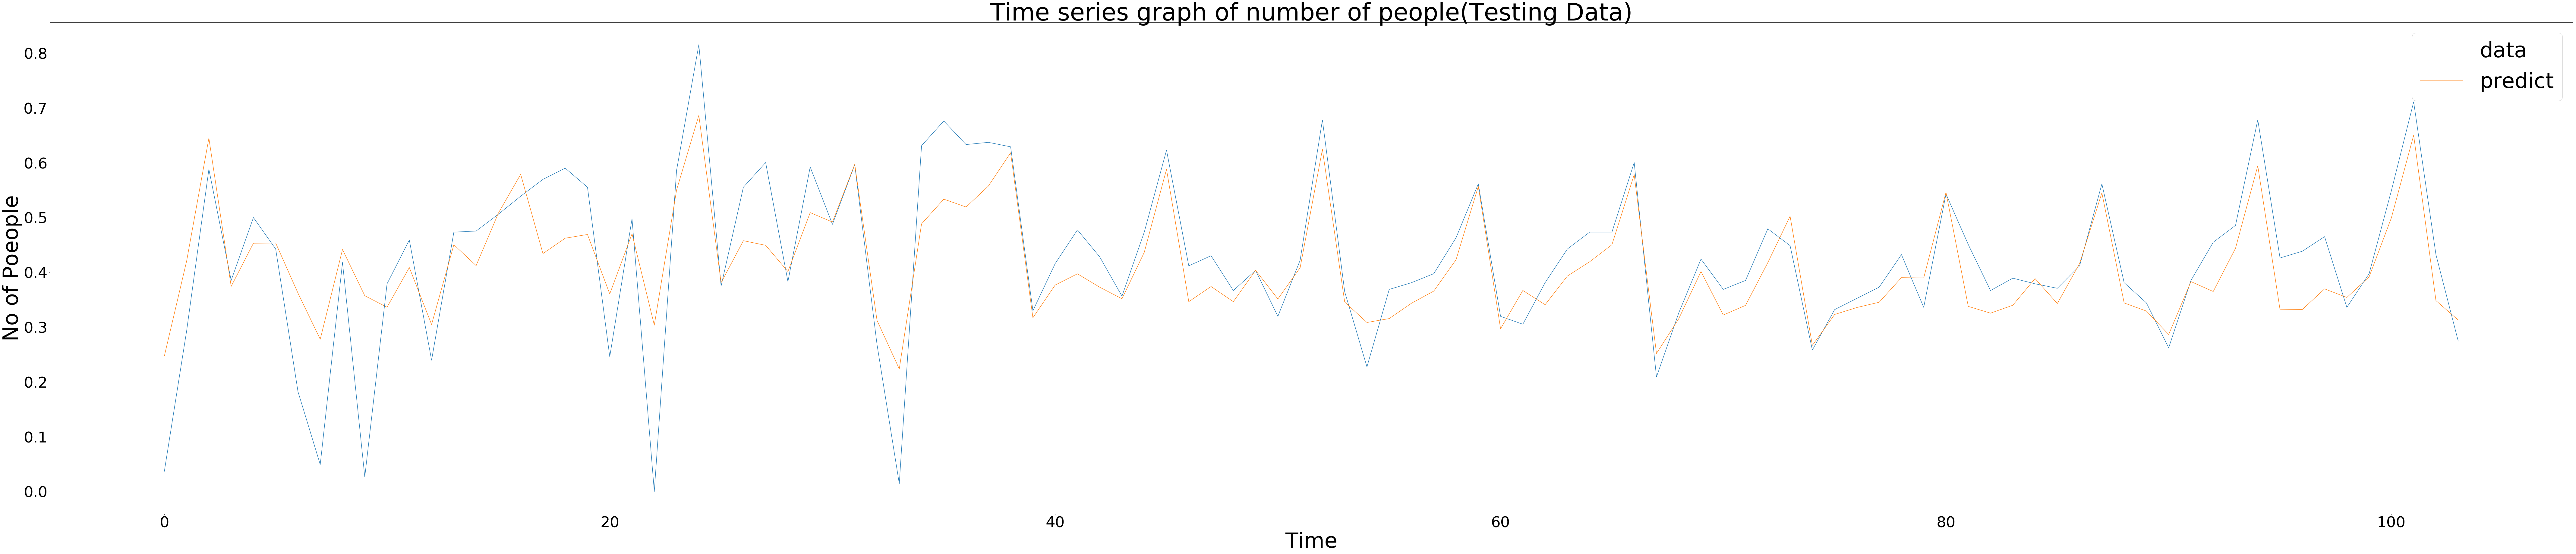

In [45]:
#Plot test dataset and predicted dataset based on test dataset
plt.plot(X_test[:,0,0], label='data')
plt.plot(preds[:,0,0], label='predict')
plt.xlabel('Time',fontsize=70)
plt.ylabel('No of Poeople',fontsize=70)
plt.tick_params(labelsize=50)
plt.title('Time series graph of number of people(Testing Data)',fontsize=80)
plt.legend(fontsize=70)
plt.show()

In [46]:
#Predict values based on train dataset
preds = vae.predict(X_train, batch_size=batch_size)

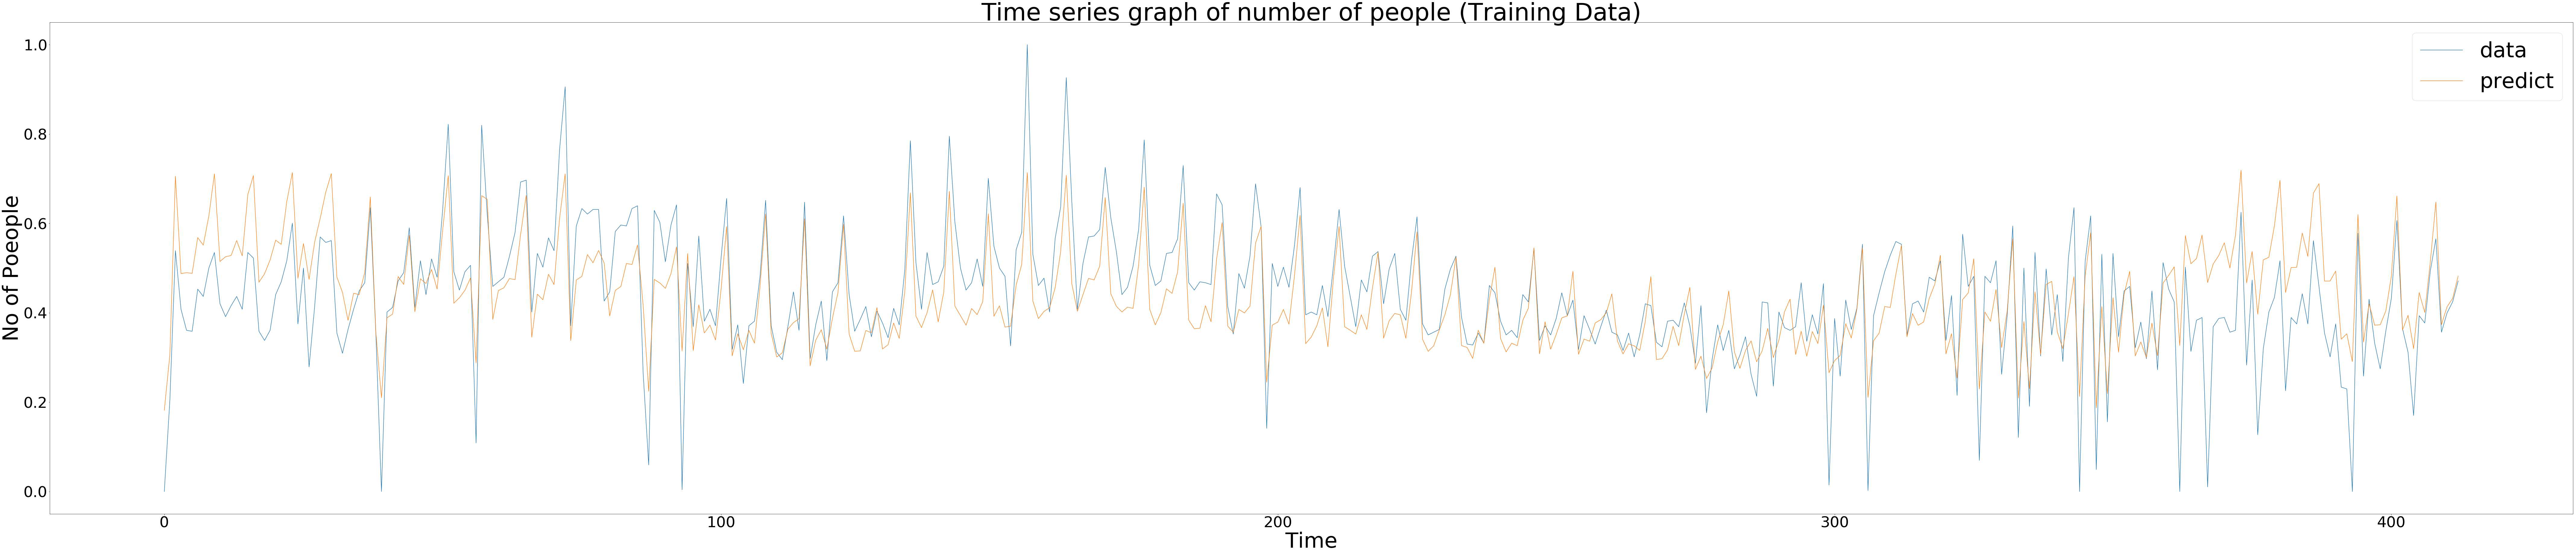

In [47]:
#Plot test dataset and predicted dataset based on train dataset
plt.plot(X_train[:,0,0], label='data')
plt.plot(preds[:,0,0], label='predict')
plt.xlabel('Time',fontsize=70)
plt.ylabel('No of Poeople',fontsize=70)
plt.tick_params(labelsize=50)
plt.title('Time series graph of number of people (Training Data)',fontsize=80)
plt.legend(fontsize=70)
plt.show()

In [48]:
x_test_encoded = encoder.predict(X_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1])
plt.colorbar()
plt.show()

NameError: name 'encoder' is not defined

In [21]:
import spacy
import nltk
import re
import pandas as pd
nltk.download('stopwords')
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
nlp = spacy.load('en')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tejashasarali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [11]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [12]:
def remove_special_characters(text):
    pattern = r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [13]:
def remove_newline(text):
    return re.sub(r'[\r|\n|\r\n]+', ' ',text)

In [61]:
def getPOSTag(sentence):
    sentence_nlp = nlp(sentence)
    spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
    return spacy_pos_tagged

In [83]:
sentence="how can i list the files"

In [84]:
sentence=remove_newline(sentence)
sentence

'how can i list the files'

In [85]:
sentence=remove_special_characters(sentence)
sentence

'how can i list the files'

In [86]:
sentence=lemmatize_text(sentence)
sentence

'how can i list the file'

In [81]:
sentence=remove_stopwords(sentence)
sentence

'list file'

In [89]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
simple_stemmer("list directory")

'list directori'

In [87]:
posTag=getPOSTag(sentence)
posTag

[(how, 'WRB', 'ADV'),
 (can, 'MD', 'VERB'),
 (i, 'PRP', 'PRON'),
 (list, 'VB', 'VERB'),
 (the, 'DT', 'DET'),
 (file, 'NN', 'NOUN')]

In [90]:
import itertools

stuff = [1, 2, 3]
for L in range(0, len(stuff)+1):
    for subset in itertools.combinations(stuff, L):
        print(subset)

()
(1,)
(2,)
(3,)
(1, 2)
(1, 3)
(2, 3)
(1, 2, 3)
